In [34]:
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import metrics
from keras import models
from keras import layers
from keras.utils import to_categorical

預處理

In [35]:
# 加載mnist資料集,包含訓練數據和測試數據
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#train_images(訓練圖片放置60000張28 * 28像素的數字圖片，且訓練標籤(train_labels)有相對應之60000條標籤對應)
print('\n train_x:%s, train_y:%s, test_x:%s, test_y:%s'%(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape))
print(train_labels[:5])  


#將圖片攤平成一維向量>>> 28 * 28 => 784
#神經網路訓練時使用浮點運算，因此需要將原始數據類型轉為float32。
#為何要/255?: (歸一化)圖片像素值在0-255範圍內，通過除以255，可以將數值映射到0-1的區間內，這樣做是為了數據標準化，使不同特徵以同標準表示出。
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

#將訓練與測試集進行one-hot，將原本的數字標籤轉換為長度為10的向量，對應位置為1，其餘為0
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#ex:原標籤為2轉換為下列
#[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)




 train_x:(60000, 28, 28), train_y:(60000,), test_x:(10000, 28, 28), test_y:(10000,)
[5 0 4 1 9]


In [36]:
#訓練:驗證 = 8 : 2(圖片)
#驗證集(20%)
x_val = train_images[48000:]
#訓練集(80%)
partial_train_images = train_images[:48000]

#訓練:驗證 = 8 : 2(標籤)
#驗證集標籤(20%)
y_val = train_labels[48000:]
#訓練集標籤(80%)
partial_train_labels = train_labels[:48000]


# history = model.fit(partial_train_images, partial_train_labels, batch_size=512, epochs=1000, validation_data=(x_val, y_val))


model建立

In [37]:
'''
    隱藏層數量(number of hidden layers): 使用單層隱藏層。
    隱藏層神經元數量(number of units): 隱藏層設置了1000個神經元。
    激活函數(activation function): 隱藏層使用ReLU激活函數,輸出層使用softmax激活函數。
    優化器(optimizer): 使用rmsprop優化器。
    批次大小(batch size): 設置為64。
    訓練迭代次數(epochs): 設置為10次迭代。
    損失函數(loss function): 使用categorical_crossentropy多類別交叉熵損失。
    評估指標(metrics): 使用準確率(accuracy)作為評估指標。
'''
    


#創建一個Sequential模型
network = models.Sequential()

#添加第一個Dense全連接層，內有1000個神經元，激活函數使用relu
#輸入shape為784維的向量，對應原資料28 * 28攤平的圖片
#因為這個模型只有一個隱藏層，層數超淺。
network.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))

#添加第二個Dense全連接層，內有10個神經元，激活函數使用softmax
#因為用於對10個數字類別(0~9)的概率進行預測，用softmax特別適合。
#softmax可以輸出壓縮至0-1之間，且所有輸出之和為1，符合機率的定義。
network.add(layers.Dense(10, activation='softmax'))

#優化器使用rmsprop，損失函數使用categorical_crossentropy，評估指標為準確率
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])
# network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
#訓練模型
history = network.fit(partial_train_images, partial_train_labels, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8020 - f1_score: 0.7973 - loss: 0.7171 - precision_18: 0.9203 - recall_18: 0.6458 - val_accuracy: 0.9452 - val_f1_score: 0.9448 - val_loss: 0.1950 - val_precision_18: 0.9582 - val_recall_18: 0.9322
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9483 - f1_score: 0.9477 - loss: 0.1779 - precision_18: 0.9629 - recall_18: 0.9372 - val_accuracy: 0.9597 - val_f1_score: 0.9594 - val_loss: 0.1390 - val_precision_18: 0.9688 - val_recall_18: 0.9528
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9653 - f1_score: 0.9650 - loss: 0.1218 - precision_18: 0.9736 - recall_18: 0.9580 - val_accuracy: 0.9663 - val_f1_score: 0.9659 - val_loss: 0.1148 - val_precision_18: 0.9736 - val_recall_18: 0.9604
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9749 - f1_score: 0.9748 - loss: 0.0905 - precision_18: 0.9805 - recall_18: 0.9699 - val_accuracy: 0.9685 - val_f1_score: 0.9682 - val_loss: 0.1030

In [39]:
# test_loss, test_acc = network.evaluate(test_images, test_labels)
# print('test_acc:', test_acc)

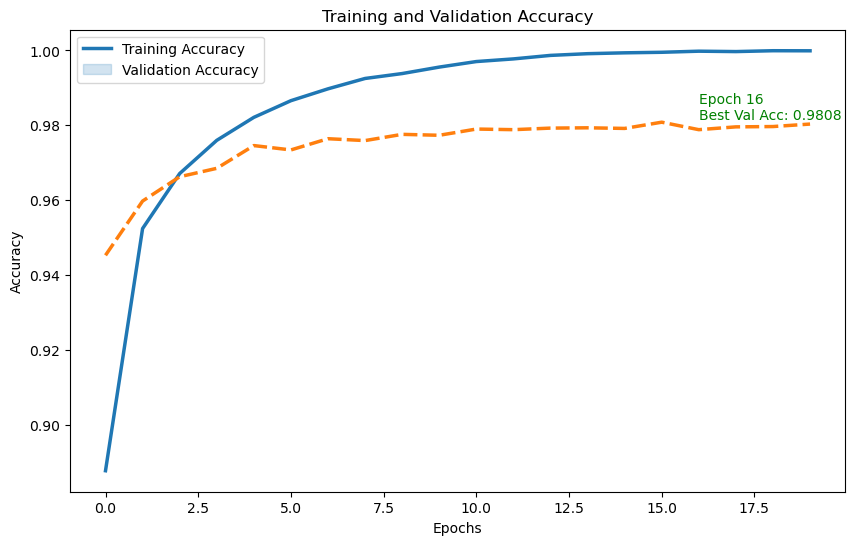

In [40]:
import seaborn as sns
import pandas as pd
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], palette="tab10", linewidth=2.5)
best_val_accuracy = history_df['val_accuracy'].max()
best_val_epoch = history_df['val_accuracy'].idxmax() + 1
plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training Accuracy', 'Validation Accuracy'])
plt.show()

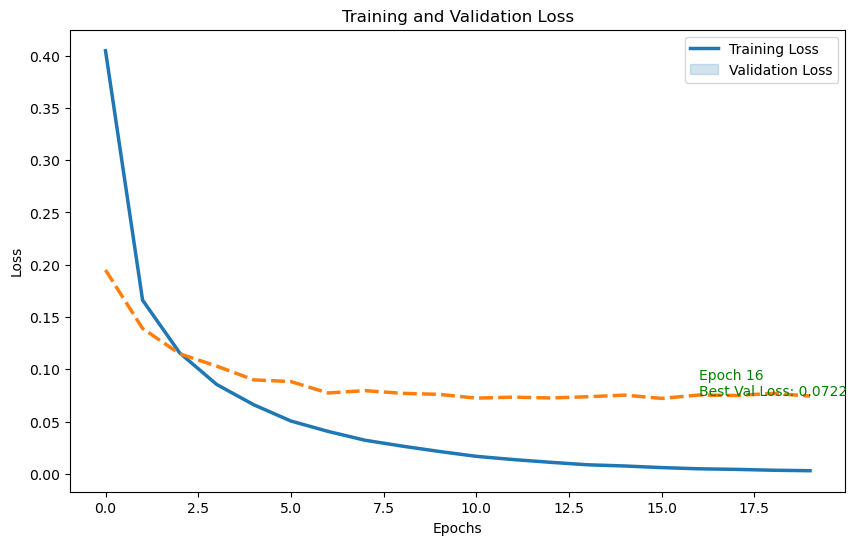

In [41]:
history_df = pd.DataFrame(history.history)
# 使用 Seaborn 繪製曲線
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['loss', 'val_loss']], palette="tab10", linewidth=2.5)
best_val_loss = history_df['val_loss'].min()
best_val_epoch = history_df['val_loss'].idxmin() + 1
plt.text(best_val_epoch, best_val_loss, f'Epoch {best_val_epoch}\nBest Val Loss: {best_val_loss:.4f}', 
             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels=['Training Loss', 'Validation Loss'])
plt.show()

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
def create_model(hidden_layers, hidden_units, activation, optimizer, learning_rate=None):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_shape=(28 * 28,)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate, weight_decay=True) 
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])
    return model


def train_model(model, epochs, batch_size, early_stop=None):
    callbacks = []
    if early_stop:
        callbacks.append(EarlyStopping(patience=early_stop))
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2, callbacks=callbacks)
    return history


不同 Activation function 績效

In [45]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'softmax', 'optimizer': 'adam', 'learning_rate': 0.001}
]

histories = []
batch = [256, 256, 256, 256]
patient = [20, 20, 20, 20]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

Epoch 1/100


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 - 3s - 18ms/step - accuracy: 0.9217 - f1_score: 0.9208 - loss: 0.2657 - precision_21: 0.9510 - recall_21: 0.8984 - val_accuracy: 0.9583 - val_f1_score: 0.9579 - val_loss: 0.1462 - val_precision_21: 0.9683 - val_recall_21: 0.9491
Epoch 2/100
188/188 - 2s - 10ms/step - accuracy: 0.9661 - f1_score: 0.9659 - loss: 0.1188 - precision_21: 0.9743 - recall_21: 0.9578 - val_accuracy: 0.9629 - val_f1_score: 0.9625 - val_loss: 0.1266 - val_precision_21: 0.9711 - val_recall_21: 0.9557
Epoch 3/100
188/188 - 2s - 10ms/step - accuracy: 0.9749 - f1_score: 0.9748 - loss: 0.0896 - precision_21: 0.9810 - recall_21: 0.9688 - val_accuracy: 0.9678 - val_f1_score: 0.9674 - val_loss: 0.1059 - val_precision_21: 0.9726 - val_recall_21: 0.9628
Epoch 4/100
188/188 - 2s - 10ms/step - accuracy: 0.9780 - f1_score: 0.9779 - loss: 0.0796 - precision_21: 0.9832 - recall_21: 0.9728 - val_accuracy: 0.9722 - val_f1_score: 0.9719 - val_loss: 0.0941 - val_precision_21: 0.9776 - val_recall_21: 0.9674
Epoch 5/100
188/

KeyboardInterrupt: 

第1組參數: 在第 17 EPOCH
最好Accuracy: 0.9832500219345093
LOSS: 0.09006528556346893
第2組參數: 在第 35 EPOCH
最好Accuracy: 0.9823333621025085
LOSS: 0.08337224274873734
第3組參數: 在第 36 EPOCH
最好Accuracy: 0.9809166789054871
LOSS: 0.08334289491176605
第4組參數: 在第 20 EPOCH
最好Accuracy: 0.949833333492279
LOSS: 0.2128673493862152


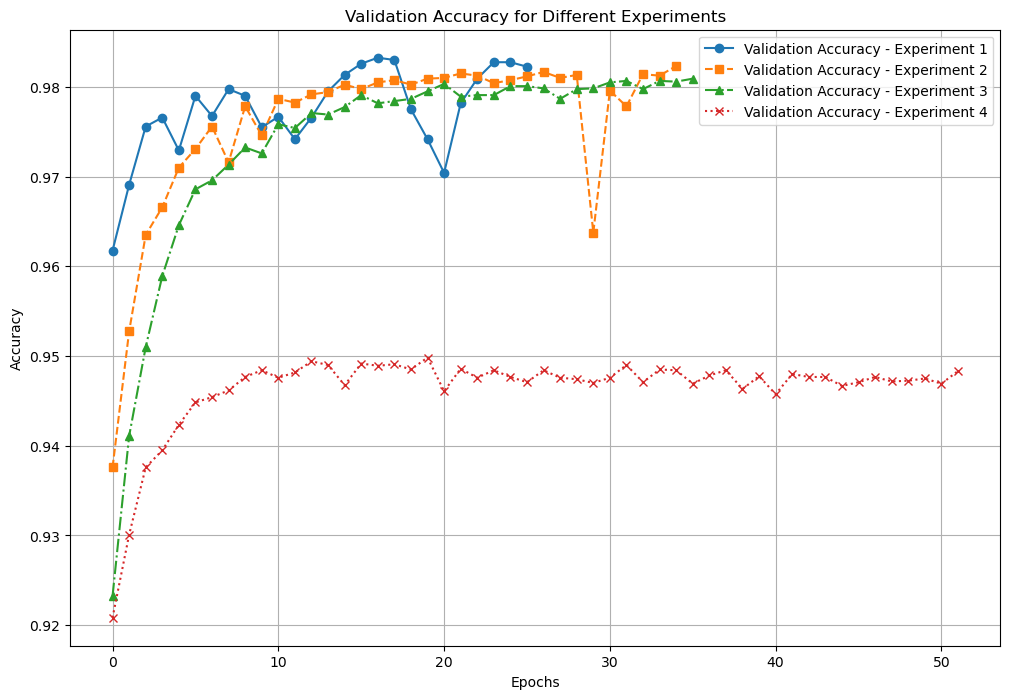

第1組參數: 在第 6 EPOCH
最好LOSS: 0.0786282867193222
第2組參數: 在第 15 EPOCH
最好LOSS: 0.07735052704811096
第3組參數: 在第 16 EPOCH
最好LOSS: 0.0723760798573494
第4組參數: 在第 32 EPOCH
最好LOSS: 0.20619000494480133


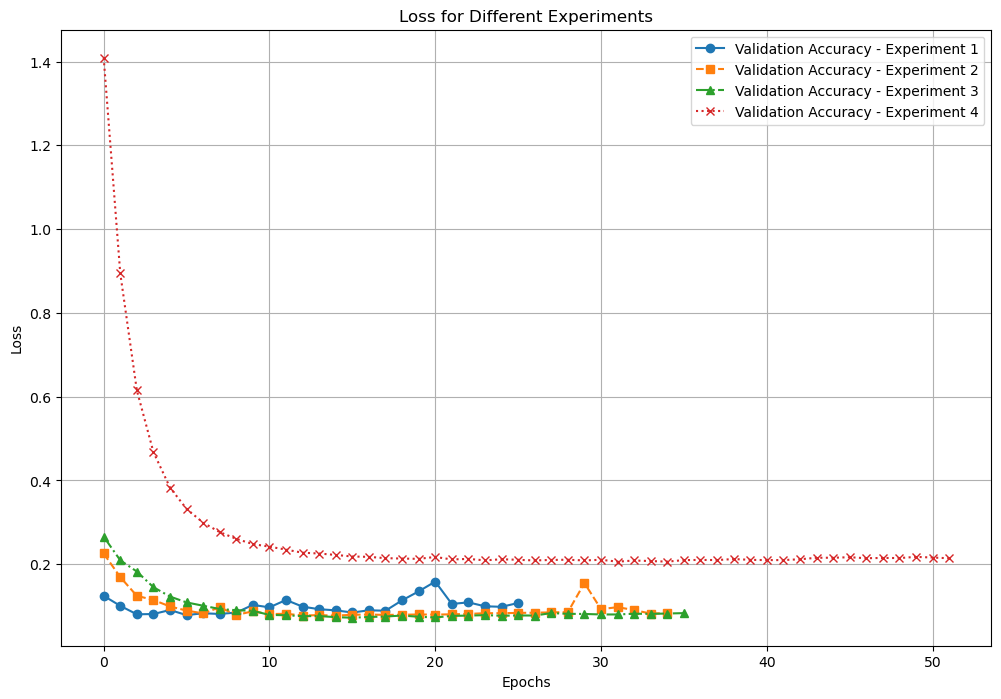

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_accuracy = history_df['val_accuracy'].max()
    best_val_epoch = history_df['val_accuracy'].idxmax() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']

    print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好Accuracy: {best_val_accuracy}\nLOSS: {best_val_loss}")
    # plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
    #             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
    # plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], label=f'Training Accuracy - Experiment {i+1}')
    plt.plot(history_df['val_accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Accuracy - Experiment {i+1}')

plt.title('Validation Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_loss = history_df['val_loss'].min()
    best_loss_epoch = history_df['val_loss'].idxmin() + 1
    print(f"第{i+1}組參數: 在第 {best_loss_epoch} EPOCH\n最好LOSS: {best_loss}")

    plt.plot(history_df['val_loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Accuracy - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
plt.title('Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()

不同參數實驗

In [ ]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 2, 'hidden_units': 256, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 3, 'hidden_units': 512, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 4, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}
]

histories = []
batch = [32, 128, 64, 256]
patient = [10, 10, 10, 10]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

Epoch 1/100
1500/1500 - 3s - 2ms/step - accuracy: 0.9178 - f1_score: 0.9167 - loss: 0.2905 - precision_14: 0.9473 - recall_14: 0.8841 - val_accuracy: 0.9552 - val_f1_score: 0.9547 - val_loss: 0.1558 - val_precision_14: 0.9657 - val_recall_14: 0.9470
Epoch 2/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9605 - f1_score: 0.9602 - loss: 0.1326 - precision_14: 0.9686 - recall_14: 0.9542 - val_accuracy: 0.9652 - val_f1_score: 0.9648 - val_loss: 0.1164 - val_precision_14: 0.9714 - val_recall_14: 0.9611
Epoch 3/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9734 - f1_score: 0.9732 - loss: 0.0898 - precision_14: 0.9783 - recall_14: 0.9696 - val_accuracy: 0.9712 - val_f1_score: 0.9709 - val_loss: 0.0953 - val_precision_14: 0.9747 - val_recall_14: 0.9682
Epoch 4/100
1500/1500 - 2s - 2ms/step - accuracy: 0.9796 - f1_score: 0.9794 - loss: 0.0671 - precision_14: 0.9826 - recall_14: 0.9768 - val_accuracy: 0.9690 - val_f1_score: 0.9687 - val_loss: 0.1011 - val_precision_14: 0.9723 - val_recall_14: 0.9668


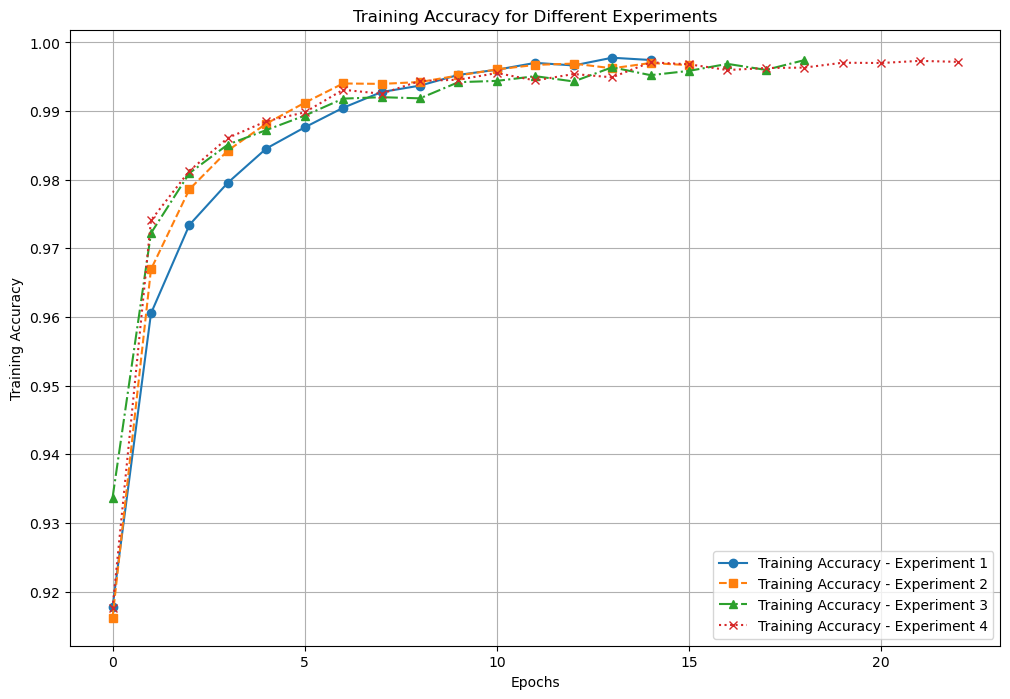

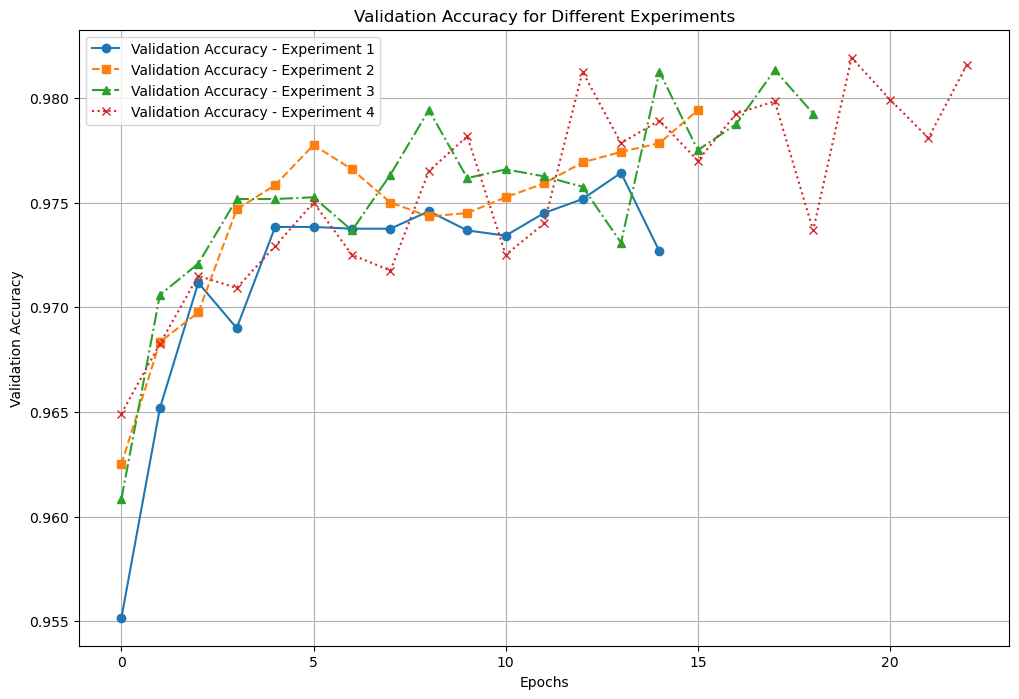

    參數組合  BEST VAL ACCURACY  BEST VAL LOSS
0  第1組參數           0.976417       0.100020
1  第2組參數           0.979417       0.103604
2  第3組參數           0.981333       0.111942
3  第4組參數           0.981917       0.104653


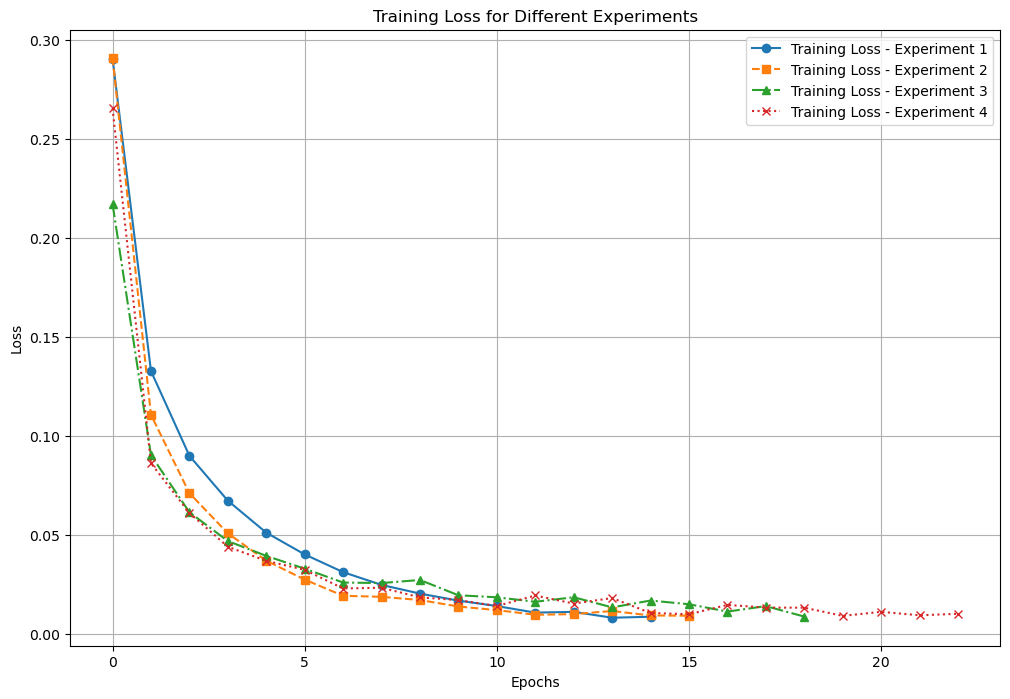

<Figure size 640x480 with 0 Axes>

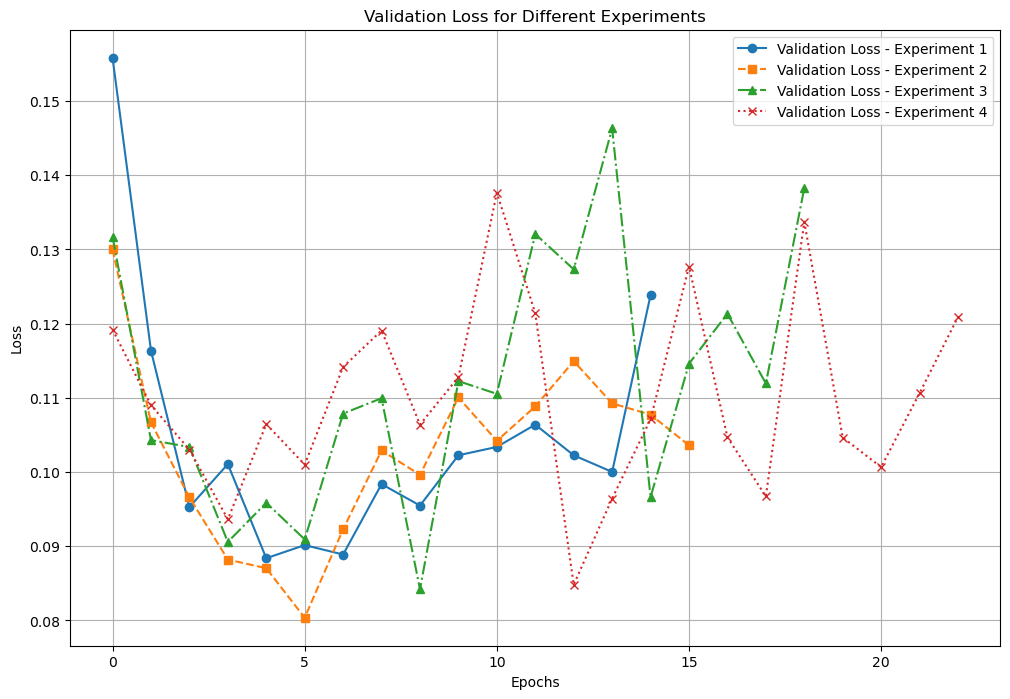

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))
results_acc = []
results_loss = []

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_accuracy = history_df['accuracy'].max()
    plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Training Accuracy - Experiment {i+1}')
plt.title('Training Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_accuracy = history_df['val_accuracy'].max()
    best_val_epoch = history_df['val_accuracy'].idxmax() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']
    results_acc.append({'參數組合': f'第{i+1}組參數', 'BEST VAL ACCURACY': best_val_accuracy, 'BEST VAL LOSS': best_val_loss})
    # print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好Accuracy: {best_val_accuracy}\nLOSS: {best_val_loss}")
    # plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
    #             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
    # plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], label=f'Training Accuracy - Experiment {i+1}')
    plt.plot(history_df['val_accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Accuracy - Experiment {i+1}')

plt.title('Validation Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
results_df_acc = pd.DataFrame(results_acc)
print(results_df_acc)


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    plt.plot(history_df['loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Training Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
plt.title('Training Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_loss = history_df['val_loss'].min()
    best_loss_epoch = history_df['val_loss'].idxmin() + 1
    # print(f"第{i+1}組參數: 在第 {best_loss_epoch} EPOCH\nBEST LOSS: {best_loss}")
    results_loss.append({'參數組合': f'第{i+1}組參數', 'BEST LOSS': best_loss, 'BEST LOSS EPOCH': best_loss_epoch})
    plt.plot(history_df['val_loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
# results_df_loss = pd.DataFrame(results_loss)
# print(results_df_loss)
plt.title('Validation Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()
